# data setting,functionsabs

In [791]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from IPython.display import display
from cycler import cycler


plt.rcParams['figure.dpi'] = 300
# plt.rcParams['axes.prop_cycle'] = cycler(color='black')
plt.rcParams['axes.prop_cycle'] = cycler(color=["black"])




def linear_regression(X,Y): 
    model = LinearRegression(fit_intercept=False)
    model.fit(X.reshape(-1,1), Y.reshape(-1,1))
    pred = model.predict(X.reshape(-1,1)).flatten()
    return model, pred

def predict(model, input_data): 
    return model.predict(input_data.reshape(-1,1)).squeeze()

In [785]:
dataframe = pd.read_excel("main.xlsx", sheet_name=["50", "100", "150"])
df_list = [dataframe["50"], dataframe["100"], dataframe["150"]]

for df in df_list:
    display(df)

,dst,1回目,2回目
0,0,50.0,50.0
1,30,46.4,47.5
2,60,44.1,45.2
3,74,30.8,31.3
4,104,28.4,29.1
5,116,15.9,16.2
6,146,13.2,13.2


,dst,1回目,2回目,3回目
0,0,100.0,100.0,100.0
1,30,92.8,93.2,93.4
2,60,87.1,87.5,87.7
3,74,57.6,57.9,58.1
4,104,51.8,52.2,52.4
5,116,25.4,25.7,25.6
6,146,19.3,19.3,19.1


,dst,1回目,2回目
0,0,150.0,150.0
1,30,139.3,139.5
2,60,130.3,130.5
3,74,83.8,84.2
4,104,74.8,75.2
5,116,34.4,34.6
6,146,25.0,24.9


In [795]:
def computeData(spec_times=("1回目", "1回目", "1回目")):
    measure_dst = dataframe['100']['dst'].values.astype(np.float32)
    sample_dst = np.array([65,69,109,111], dtype=np.float32)
    sample_dst_idx = ((0,1), (1,3), (3,4))
    temp_reg = np.zeros((3,4))
    # spec_times = ("1回目", "1回目", "1回目")
    spec_times = spec_times
    init_temp = ("50","100","150")
    return_df_list = []
    writer = pd.ExcelWriter("return.xlsx")
    
    fig, ax = plt.subplots(4,1, figsize=(13,15))
    
    for i,df in enumerate(df_list): 
        for j,(start,end) in enumerate(((0,3), (3,5), (5,7))): 
            X = measure_dst[start:end]
            Y = df[spec_times[i]][start:end].values.astype(np.float32)
            start,end = sample_dst_idx[j]
            model,pred = linear_regression(X-X[0],Y-Y[0])
            temp_reg[i][start:end] = predict(model, sample_dst[start:end]-X[0]).flatten()+Y[0]
            ax[i].scatter(X,Y,s=15)
            # ax[i].plot(X, pred+Y[0])
            ax[i].scatter(sample_dst[start:end],temp_reg[i][start:end],s=15,color='red')
            ax[i].plot(np.sort(np.concatenate([X,sample_dst[start:end]])),
                       np.sort(np.concatenate([pred+Y[0], temp_reg[i][start:end]]))[::-1])
            ax[i].plot((sample_dst[start:end], sample_dst[start:end]),(0,170),lw=1,color='black')
            
            ax[3].scatter(X,Y,s=15)
            ax[3].scatter(sample_dst[start:end],temp_reg[i][start:end],s=15,color='red')
            ax[3].plot(np.sort(np.concatenate([X,sample_dst[start:end]])),
                       np.sort(np.concatenate([pred+Y[0], temp_reg[i][start:end]]))[::-1])
            ax[3].plot((sample_dst[start:end], sample_dst[start:end]),(0,170),lw=1,color='black')
    
        return_df = pd.DataFrame()
        return_df['dst'] = np.sort(np.concatenate([measure_dst,sample_dst]))[::-1]
        return_df['temp'] = np.sort(np.concatenate([df[spec_times[i]].values.astype(np.float32),
                                                    temp_reg[i]]))[::-1]
        return_df.to_excel(writer,sheet_name=init_temp[i],index=False)
        
    writer.close()
    
     
    for i in range(3): 
        for j in range(2): 
            ax[i].plot((sample_dst[0+j*2],sample_dst[1+j*2]),
                   (temp_reg[i][0+j*2], temp_reg[i][1+j*2]),lw=1,color='black')
            ax[3].plot((sample_dst[0+j*2],sample_dst[1+j*2]),
                   (temp_reg[i][0+j*2], temp_reg[i][1+j*2]),lw=1,color='black')
    
    for i in range(4):
        ax[i].set_xlim(0,146)
        ax[i].set_ylim(0,170)
        ax[i].set_xticks(measure_dst)
        ax[i].set_xlabel(r"Distance from $t_0$ [\si{mm}]")
        ax[i].set_ylabel("Temperature [\si{\degreeCelsius}]")
    
    plt.savefig("graph.pdf", bbox_inches="tight")

# compute

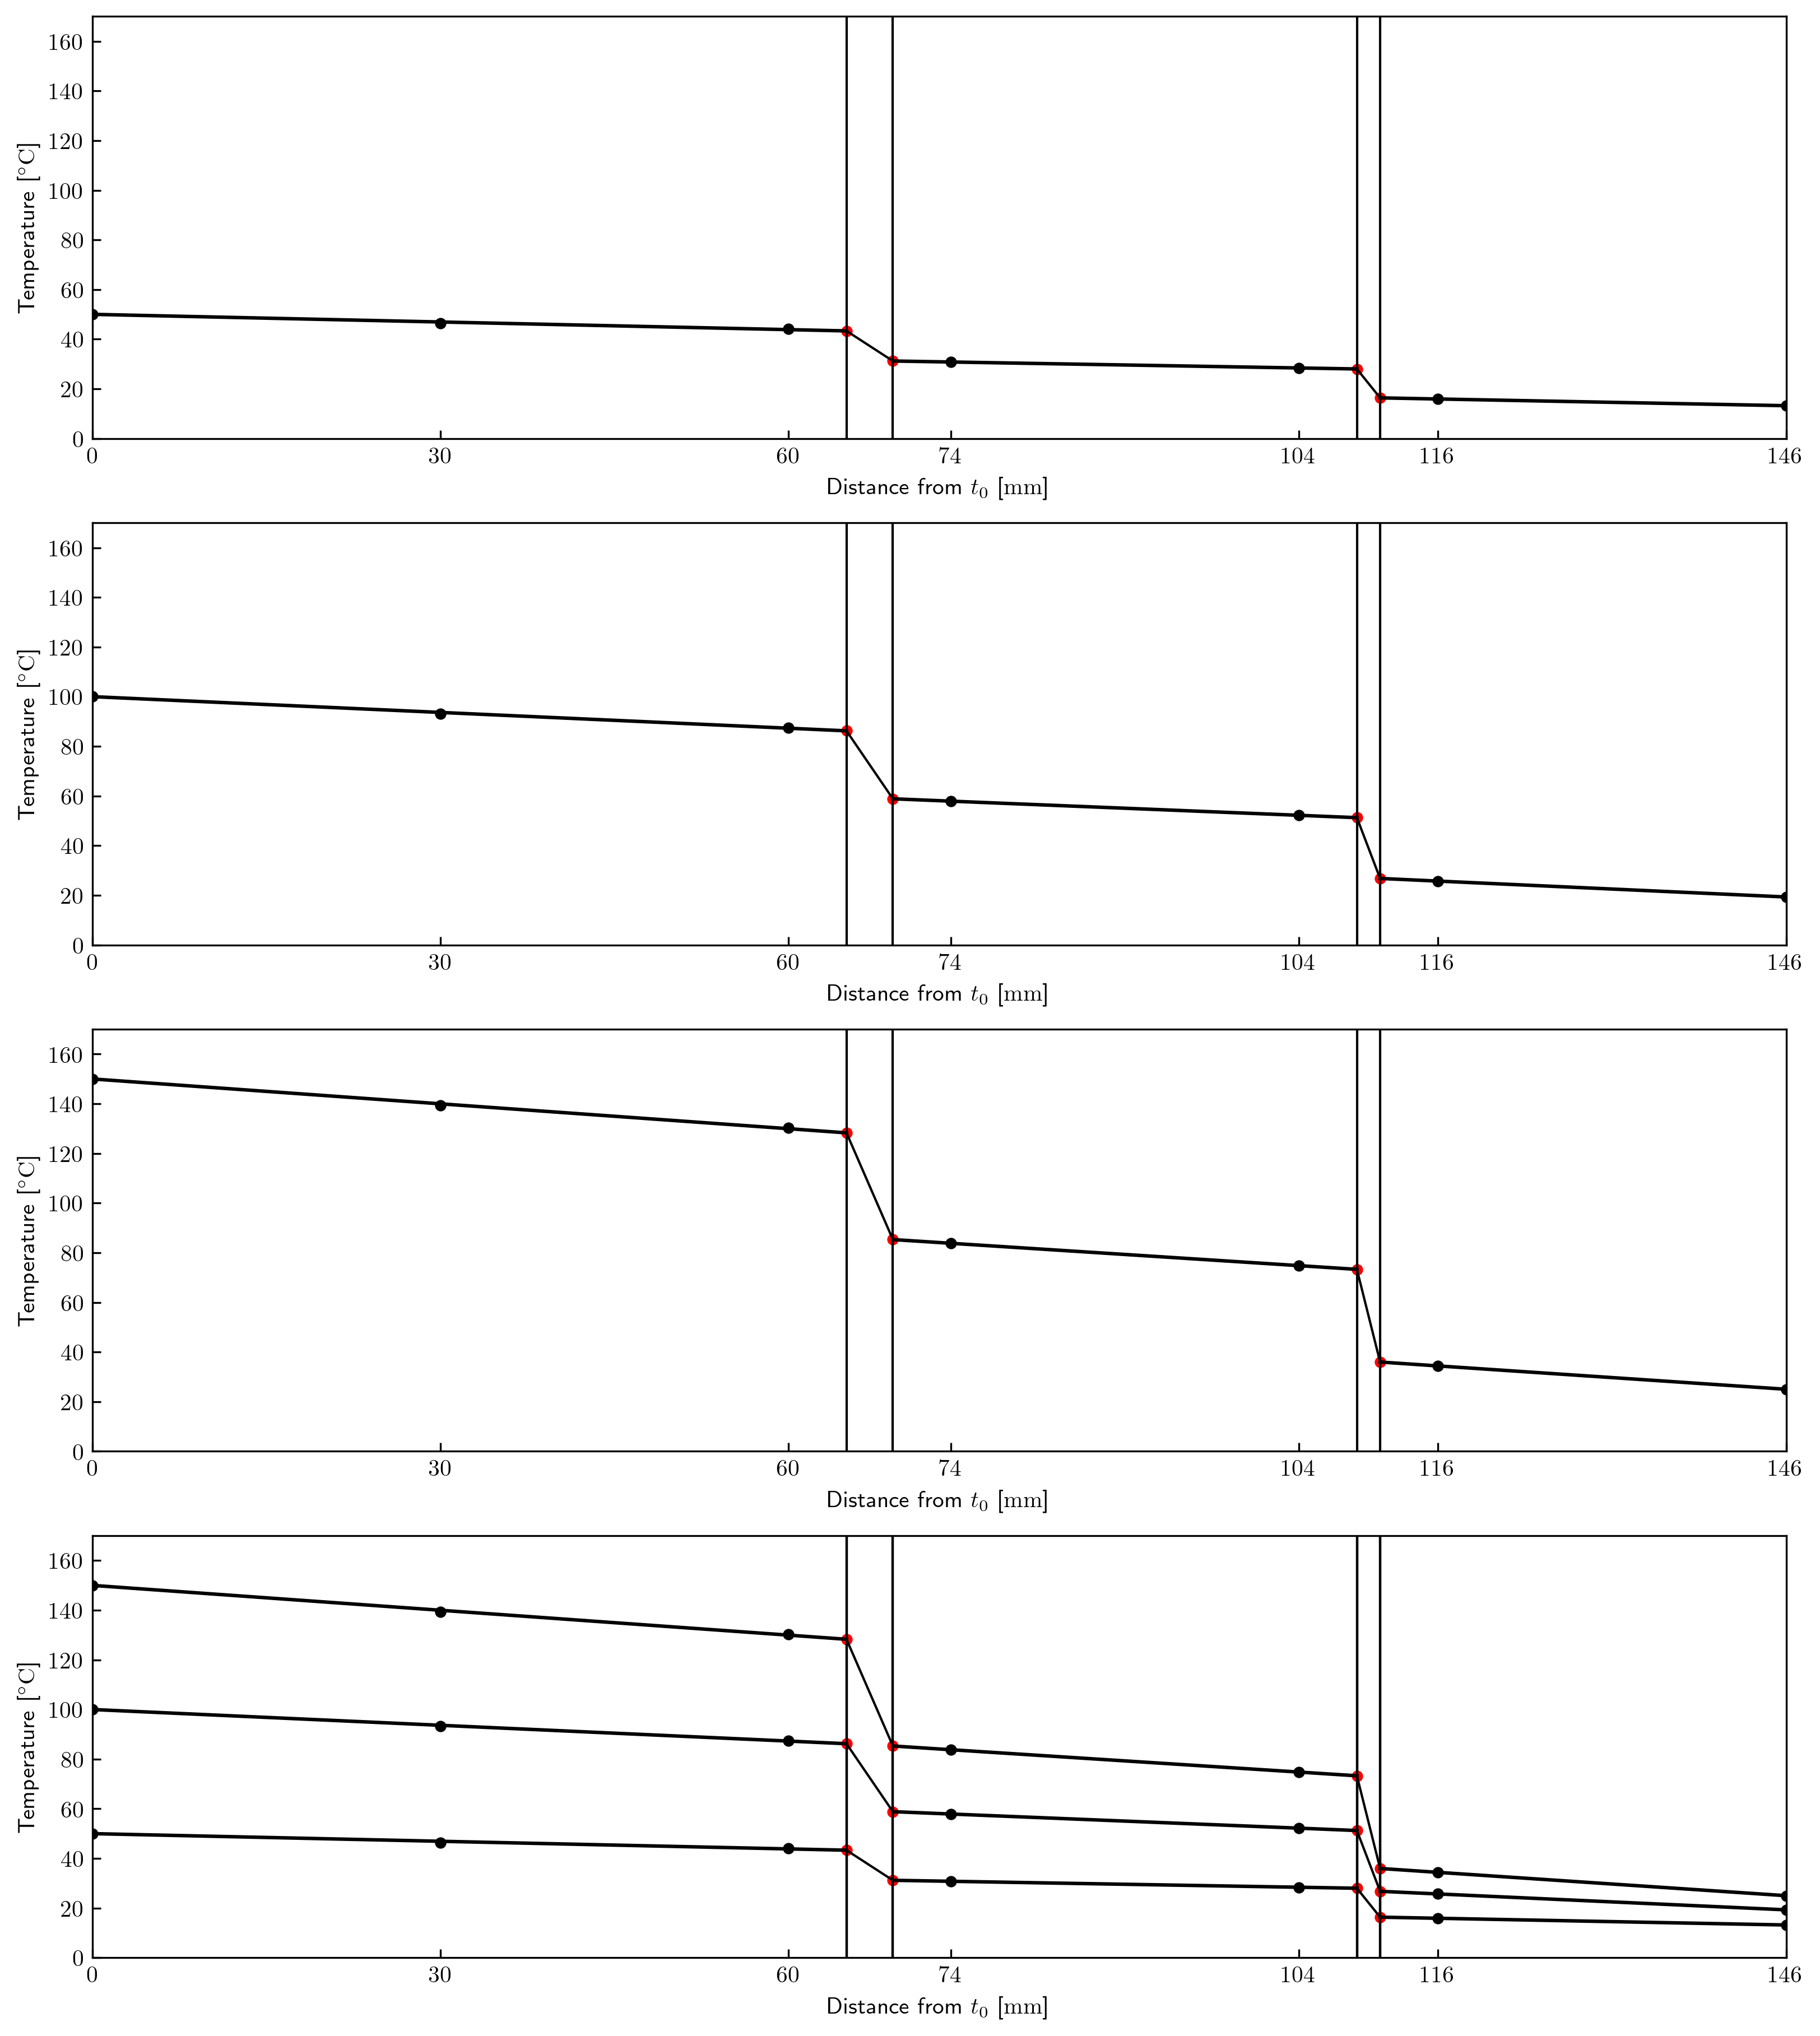

In [797]:
computeData(("1回目", "1回目", "1回目"))